#  제8장

In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import os
from ipypublish import nb_setup

In [2]:
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

### 1. 개별값 예측과 평균의 예측

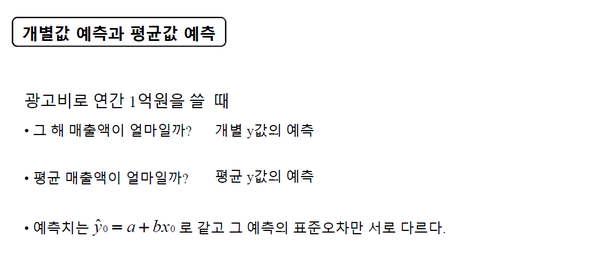

In [3]:
nb_setup.images_hconcat(['C:/HSCHUNG/PYTHON/B_CLASS/A_BigDataEconomics/PNG/W09_0513/9_26_예측오차1.png'], width=600)

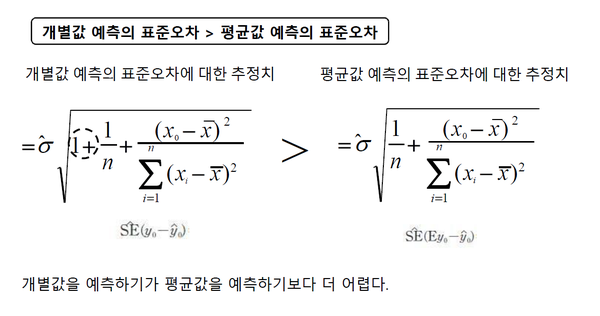

In [4]:
nb_setup.images_hconcat(['C:/HSCHUNG/PYTHON/B_CLASS/A_BigDataEconomics/PNG/W09_0513/9_27_예측오차2.png'], width=600)

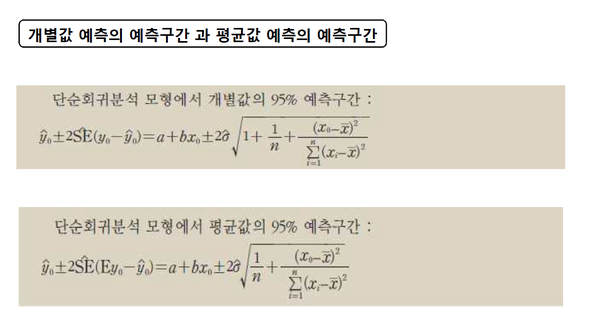

In [5]:
nb_setup.images_hconcat(['C:/HSCHUNG/PYTHON/B_CLASS/A_BigDataEconomics/PNG/W09_0513/9_28_예측오차3.png'], width=600)

In [3]:
df = pd.read_csv("education2020.csv")

In [4]:
df = df[['age', 'number', 'education_year', 'income']]

In [5]:
df1 = df.loc[df['number'].isin([1]) & (df['age'] >= 30) & (df['age'] < 39)]

In [6]:
df1.tail()

,age,number,education_year,income
17525,37,1,12,3519
17544,30,1,14,1970
17599,37,1,16,5896
17696,37,1,14,1370
18014,34,1,16,5382


In [7]:
edu_model = ols("income ~ education_year", data=df1).fit()
print(edu_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     14.92
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           0.000133
Time:                        15:38:10   Log-Likelihood:                -3203.2
No. Observations:                 352   AIC:                             6410.
Df Residuals:                     350   BIC:                             6418.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        408.7517    826.622      0.

In [8]:
intercept = edu_model.params[0]
coef1 = edu_model.params[1]

In [9]:
intercept

408.7516571965365

In [10]:
coef1

214.57440074548248

### 1. $y_{16}$을 구한다.

In [11]:
x_0 = 16 # 대학졸업

In [12]:
y_16  = intercept + coef1 * 16

In [13]:
y_16.round(1)

3841.9

### 1. $\hat{\sigma}\$을 구한다.

In [15]:
df2 = df1.copy()

In [16]:
df2['fitted'] = intercept + df2['education_year'] * coef1

In [17]:
df2['sse'] = (df2['income'] - df2['fitted'])**2

In [18]:
df3 = df2['sse']

In [19]:
n = len(df3.index)

In [20]:
df4 = df3.sum(axis=0)

In [21]:
df4

1652487542.6469631

In [22]:
sigma_hat = np.sqrt(df4/(n-2))

In [23]:
sigma_hat

2172.876659866207

In [24]:
np.round(sigma_hat, 2)

2172.88

### 2. 평균추정치에 대한 표준오차를 구하고 신뢰구간을 구한다

In [25]:
x_0 = 16 # 대학졸업

In [26]:
df2['x_bar'] = df2['education_year'].mean()

In [27]:
x_bar = df2['education_year'].mean()

In [28]:
x_bar

14.735795454545455

In [29]:
df2['x_residual2'] = (df2['education_year'] - df2['x_bar']) ** 2

In [30]:
df2

,age,number,education_year,income,fitted,sse,x_bar,x_residual2
19,35,1,14,1089,3412.793268,5.400015e+06,14.735795,0.541395
134,30,1,16,3756,3841.942069,7.386039e+03,14.735795,1.598213
157,30,1,16,2004,3841.942069,3.378031e+06,14.735795,1.598213
190,36,1,16,5802,3841.942069,3.841827e+06,14.735795,1.598213
191,31,1,16,3032,3841.942069,6.560062e+05,14.735795,1.598213
...,...,...,...,...,...,...,...,...
17525,37,1,12,3519,2983.644466,2.866055e+05,14.735795,7.484577
17544,30,1,14,1970,3412.793268,2.081652e+06,14.735795,0.541395
17599,37,1,16,5896,3841.942069,4.219154e+06,14.735795,1.598213
17696,37,1,14,1370,3412.793268,4.173004e+06,14.735795,0.541395


In [31]:
df3  = df2['x_residual2']

In [32]:
df4 = df3.sum(axis = 0)

In [33]:
x_residual2= df4

In [34]:
x_residual2.round(1)

1530.4

In [35]:
n = len(df3.index)

In [36]:
n

352

In [37]:
se1_16 = np.sqrt(1/n + (x_0 - x_bar)**2/x_residual2) * sigma_hat

In [38]:
se1_16.round(1)

135.4

In [39]:
y_16  = intercept + coef1 * 16

In [40]:
y_16.round(1)

3841.9

In [41]:
lb = y_16 - 2 * se1_16
hb = y_16  + 2 * se1_16

In [42]:
lb.round(2)

3571.07

In [43]:
hb.round(2)

4112.82

### 3. 개별추정치에 대한 표준오차를 구하고 신뢰구간을 구한다

In [44]:
y_16

3841.9420691242562

In [45]:
se2_16 = np.sqrt(1 + 1/n + (x_0 - x_bar)**2/x_residual2) * sigma_hat

In [46]:
se2_16.round(2)

2177.09

In [47]:
lb2 = y_16 - 2 * se2_16
hb2 = y_16  + 2 * se2_16

In [48]:
lb2.round(2)

-512.25

In [49]:
hb2.round(2)

8196.13